# Visualize results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/nest_weights/excitatory_2023-08-10 12:16:11.768289.tsv-943-1.dat", skiprows=3)
sender, t, w, target, _, _ = data.T

ValueError: not enough values to unpack (expected 6, got 2)

In [14]:
np.unique(sender)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [3]:
plt.plot(t[[np.where(sender == 85)]].T,w[np.where(sender == 85)])
plt.xlabel("Time (ms)") 
plt.ylabel("Weight")
plt.xlim(0,10000)
plt.title("Weight change")

/gpfs/scratch/pn98bi/ge72puf2/ge72puf2/ipykernel_17134/3755973894.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.plot(t[[np.where(sender == 85)]].T,w[np.where(sender == 85)])


IndexError: invalid index to scalar variable.

In [21]:
data = np.loadtxt("spikes/spikes_exc_2023-08-10 10:13:49.695773.tsv-1887-2.dat", skiprows=3)
sender, ts = data.T

ts_int = ts.astype(int)

In [22]:
spikes = np.zeros(int(max(ts_int)) + 1)
for tp, _ in zip(ts_int, sender):
    spikes[tp] += 1

Text(0, 0.5, 'Spikes')

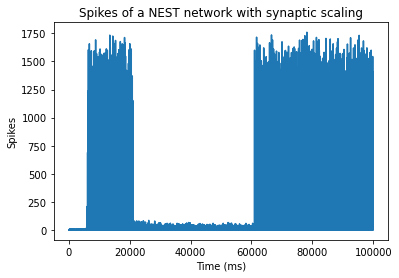

In [23]:
plt.plot(spikes)
plt.title("Spikes of a NEST network with synaptic scaling")
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")

In [46]:
bursts_before = np.where(spikes[:50000] > 1000)
bursts_after = np.where(spikes[50000:] > 1000)

(array([123.,   0.,   0.,   0.,   0.,   0.,   1.,   6.,  38.,  48.]),
 array([  1. ,  18.4,  35.8,  53.2,  70.6,  88. , 105.4, 122.8, 140.2,
        157.6, 175. ]),
 <BarContainer object of 10 artists>)

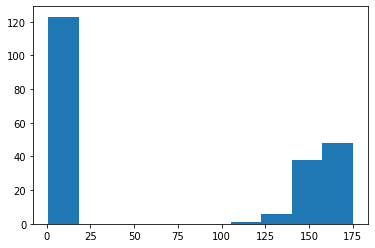

In [47]:
plt.hist(np.diff(bursts_before)[0])

(array([307.,   0.,   0.,   0.,   0.,   0.,   4.,  25., 133.,  84.]),
 array([  1.,  19.,  37.,  55.,  73.,  91., 109., 127., 145., 163., 181.]),
 <BarContainer object of 10 artists>)

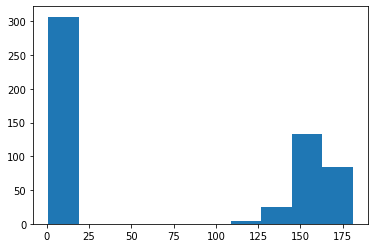

In [48]:
plt.hist(np.diff(bursts_after)[0])

# MATLAB spikes

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

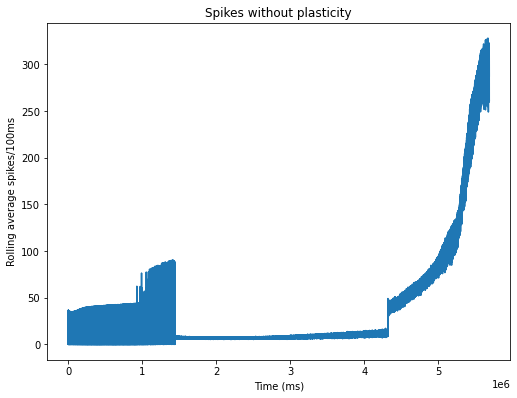

In [5]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/spikes_10-Aug-2023 18:05:56", skiprows=3)
ts, sender = data.T

ts_int = ts.astype(int)
spikes = np.zeros(int(max(ts_int)) + 1)
for t, _ in zip(ts_int, sender):
    spikes[t] += 1

N = 100
spikes_avg = np.convolve(spikes, np.ones(N)/N, mode='valid')

figure(figsize=(8.3, 6.2))

plt.plot(spikes_avg)
plt.title("Spikes without plasticity")
plt.xlabel("Time (ms)")
plt.ylabel("Rolling average spikes/100ms");

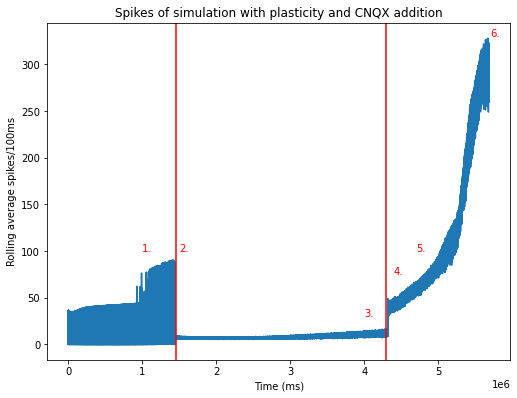

In [17]:
#2h sim result plot
figure(figsize=(8.3, 6.2))

plt.plot(spikes_avg)
plt.axvline(x = 1.45e6, color = "red")
plt.axvline(x = 4.3e6, color = "red")
plt.annotate("1.", (1e6, 100), color = "red")
plt.annotate("2.", (1.5e6, 100), color = "red")
plt.annotate("3.", (4e6, 30), color = "red")
plt.annotate("4.", (4.4e6, 75), color = "red")
plt.annotate("5.", (4.7e6, 100), color = "red")
plt.annotate("6.", (5.7e6, 330), color = "red")
plt.title("Spikes of simulation with plasticity and CNQX addition")
plt.xlabel("Time (ms)")
plt.ylabel("Rolling average spikes/100ms");

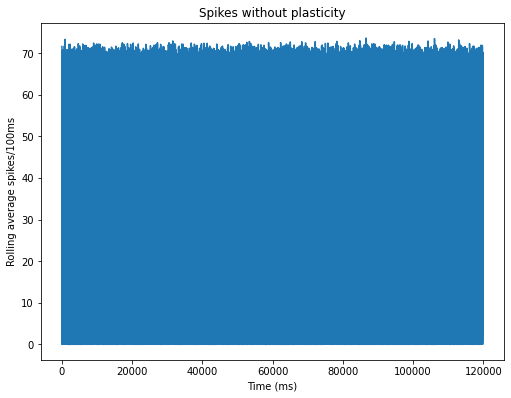

In [25]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/spikes_11-Sep-2023 17:33:26_noplast", skiprows=3)
ts, sender = data.T

ts_int = ts.astype(int)
spikes = np.zeros(int(max(ts_int)) + 1)
for t, _ in zip(ts_int, sender):
    spikes[t] += 1

N = 100
spikes_avg = np.convolve(spikes, np.ones(N)/N, mode='valid')

figure(figsize=(8.3, 6.2))

plt.plot(spikes_avg)
plt.title("Spikes without plasticity")
plt.xlabel("Time (ms)")
plt.ylabel("Rolling average spikes/100ms");

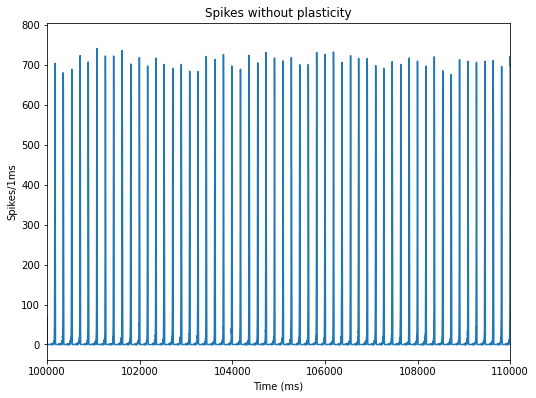

In [31]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/spikes_11-Sep-2023 17:33:26_noplast", skiprows=3)
ts, sender = data.T

ts_int = ts.astype(int)
spikes = np.zeros(int(max(ts_int)) + 1)
for t, _ in zip(ts_int, sender):
    spikes[t] += 1

figure(figsize=(8.3, 6.2))

plt.plot(spikes)
plt.xlim((100000, 110000))
plt.title("Spikes without plasticity")
plt.xlabel("Time (ms)")
plt.ylabel("Spikes/1ms");

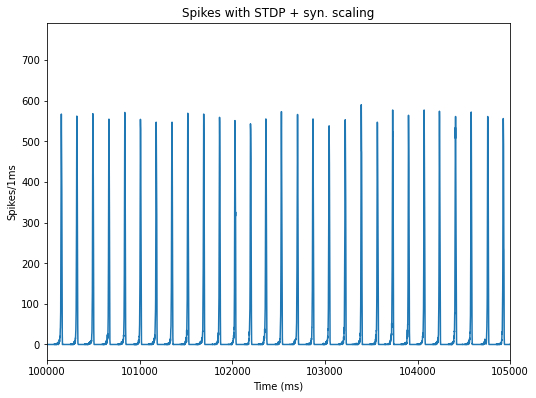

In [33]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/spikes_11-Sep-2023 09:49:17_nodepr", skiprows=3)
ts, sender = data.T

ts_int = ts.astype(int)
spikes = np.zeros(int(max(ts_int)) + 1)
for t, _ in zip(ts_int, sender):
    spikes[t] += 1

figure(figsize=(8.3, 6.2))

plt.plot(spikes)
plt.xlim((100000, 105000))
plt.title("Spikes with STDP + syn. scaling")
plt.xlabel("Time (ms)")
plt.ylabel("Spikes/1ms");

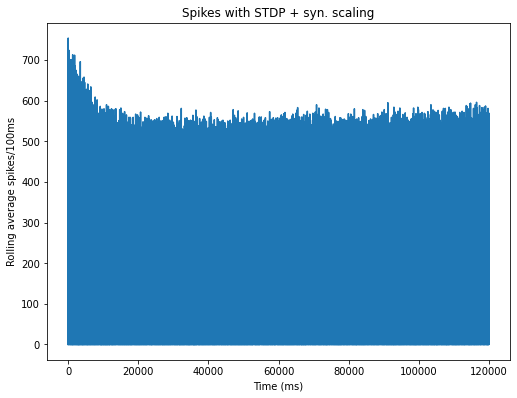

In [26]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/spikes_11-Sep-2023 09:49:17_nodepr", skiprows=3)
ts, sender = data.T

ts_int = ts.astype(int)
spikes = np.zeros(int(max(ts_int)) + 1)
for t, _ in zip(ts_int, sender):
    spikes[t] += 1

N = 100
spikes_avg = np.convolve(spikes, np.ones(N)/N, mode='valid')

figure(figsize=(8.3, 6.2))

plt.plot(spikes)
plt.title("Spikes with STDP + syn. scaling")
plt.xlabel("Time (ms)")
plt.ylabel("Rolling average spikes/100ms");

Text(0, 0.5, 'Rolling average spikes/)100ms')

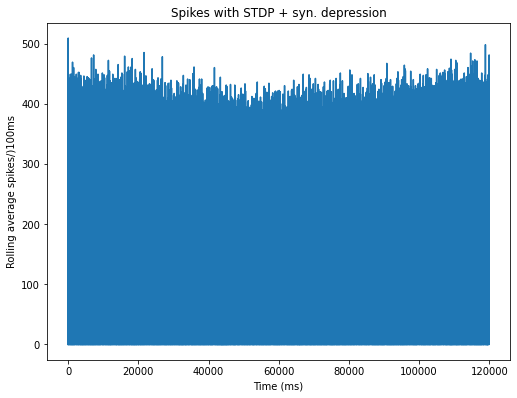

In [42]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/spikes_11-Sep-2023 13:11:58_nosynscaling", skiprows=3)
ts, sender = data.T

ts_int = ts.astype(int)
spikes = np.zeros(int(max(ts_int)) + 1)
for t, _ in zip(ts_int, sender):
    spikes[t] += 1

N = 10
spikes_avg = np.convolve(spikes, np.ones(N)/N, mode='valid')
plt.figure(figsize=(8.3, 6.2))


plt.plot(spikes)
plt.title("Spikes with STDP + syn. depression")
plt.xlabel("Time (ms)")
plt.ylabel("Rolling average spikes/)100ms")

In [44]:
spikes_m = np.zeros((int(max(ts_int)) + 1, int(max(sender))))
for t, s in zip(ts_int, sender):
    spikes_m[t,int(s)-1] += 1

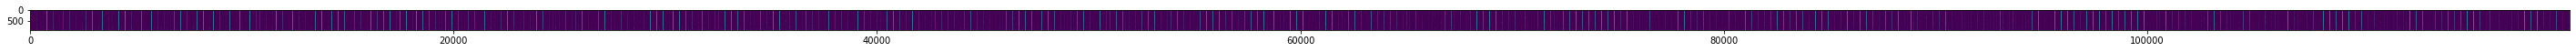

In [53]:
plt.figure(figsize=(50, 30))
plt.imshow(spikes_m.T);

(110000.0, 111000.0)

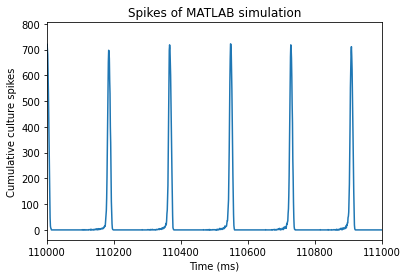

In [22]:
plt.plot(spikes)
plt.title("Spikes of MATLAB simulation")
plt.xlabel("Time (ms)")
plt.ylabel("Cumulative culture spikes")
plt.xlim(110000, 111000)

In [4]:
spidx = np.where(spikes > 100)[0]
low_spidx = np.where(spikes > 20)[0] 
before_cnqx = np.diff(spidx[spidx < 1.5e6])
during_cnqx = np.diff(low_spidx[np.logical_and(low_spidx > 1.5e6, low_spidx < 4.32e6)])
after_washoff = np.diff(spidx[spidx > 4.32e6])

In [5]:
before_cnqx

array([1, 1, 1, ..., 1, 1, 1])

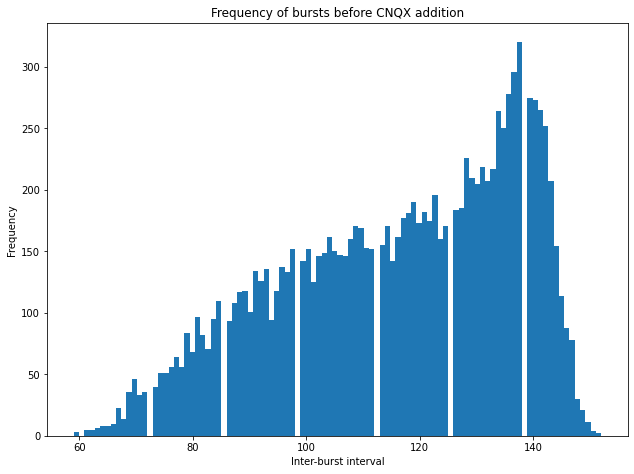

In [6]:
figure(figsize=(10.4, 7.6))
plt.hist(before_cnqx[np.logical_and(before_cnqx>10, before_cnqx<300)], bins = 100);

plt.title("Frequency of bursts before CNQX addition")
plt.xlabel("Inter-burst interval")
plt.ylabel("Frequency");

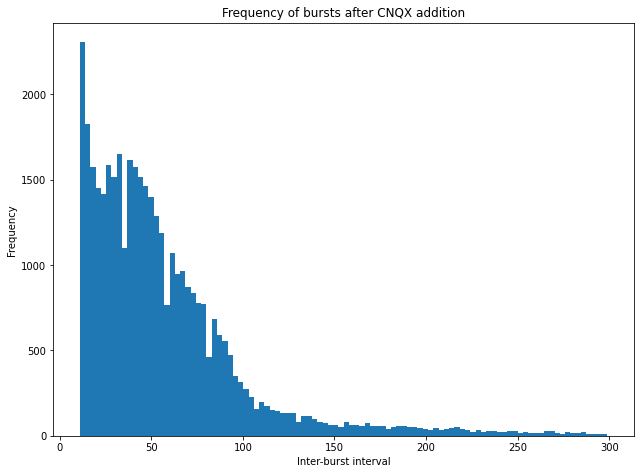

In [7]:
figure(figsize=(10.4, 7.6))

plt.hist(during_cnqx[np.logical_and(during_cnqx>10, during_cnqx<300)], bins = 100);

plt.title("Frequency of bursts after CNQX addition")
plt.xlabel("Inter-burst interval")
plt.ylabel("Frequency");

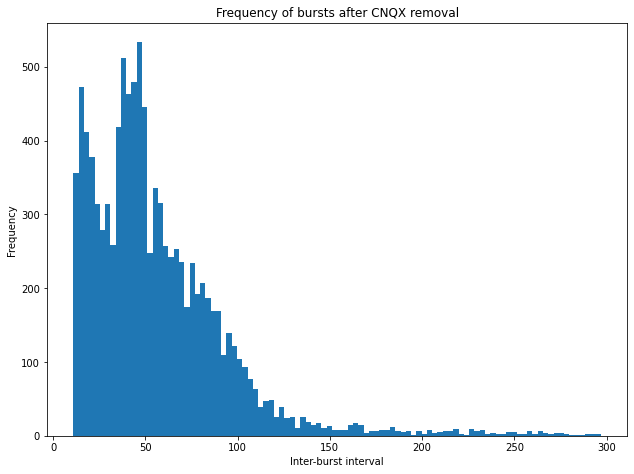

In [8]:
figure(figsize=(10.4, 7.6))
plt.hist(after_washoff[np.logical_and(after_washoff>10, after_washoff<300)], bins = 100);

plt.title("Frequency of bursts after CNQX removal")
plt.xlabel("Inter-burst interval")
plt.ylabel("Frequency");

In [28]:
bursts_before = np.where(spikes[:20000] > 300)
bursts_after = np.where(spikes[20000:40000] > 300)

Text(0.5, 1.0, 'Inter spike intervals before CNQX addition')

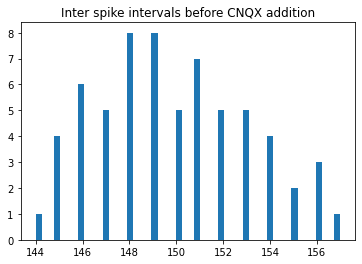

In [26]:
isis_before = np.diff(bursts_before)[0]
plt.hist(isis_before[np.where(isis_before > 5)], bins = 50)
plt.title("Inter spike intervals before CNQX addition")

Text(0.5, 1.0, 'Inter spike intervals after CNQX addition')

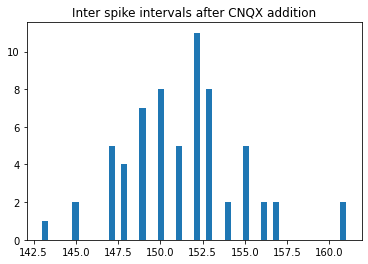

In [29]:
isis_after = np.diff(bursts_after)[0]
plt.hist(isis_after[np.where(isis_after > 5)], bins = 50)
plt.title("Inter spike intervals after CNQX addition")

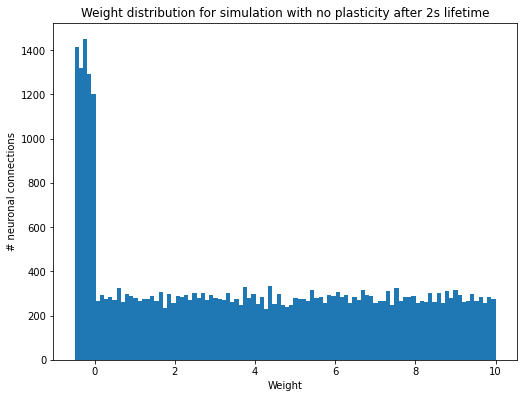

In [10]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/weights_11-Sep-2023 17:33:26", skiprows=3)
ts, x, y, w = data.T
d = np.vstack((ts,x,y,w))
idx = np.where(d[0] == 120000)[0]
figure(figsize=(8.3, 6.2))
plt.hist(d[3,idx], bins = 100);
plt.title("Weight distribution for simulation with no plasticity after 2s lifetime")
plt.xlabel("Weight")
plt.ylabel("# neuronal connections");

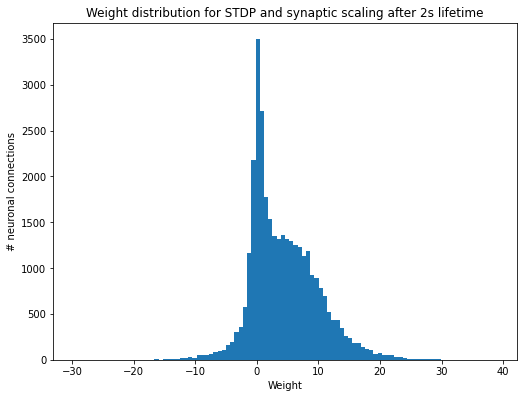

In [11]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/weights_11-Sep-2023 09:49:17", skiprows=3)
ts, x, y, w = data.T
d = np.vstack((ts,x,y,w))
idx = np.where(d[0] == 120000)[0]
figure(figsize=(8.3, 6.2))

plt.hist(d[3,idx], bins = 100);
plt.title("Weight distribution for STDP and synaptic scaling after 2s lifetime")
plt.xlabel("Weight")
plt.ylabel("# neuronal connections");

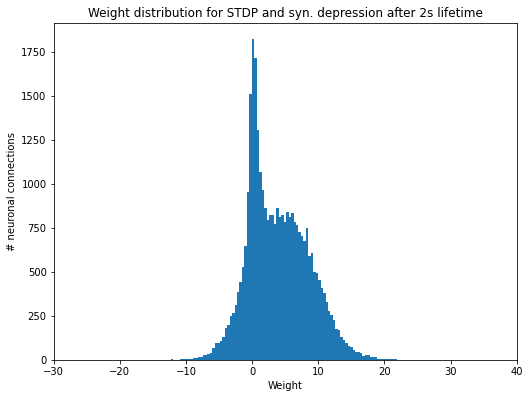

In [2]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/weights_10-Aug-2023 18:05:56_2hsim", skiprows=3)
ts, x, y, w = data.T
d = np.vstack((ts,x,y,w))
idx = np.where(d[0] == 120000)[0]
figure(figsize=(8.3, 6.2))

plt.hist(d[3,idx], bins = 100);
plt.xlim((-30, 40))
plt.title("Weight distribution for STDP and syn. depression after 2s lifetime")
plt.xlabel("Weight")
plt.ylabel("# neuronal connections");

ValueError: alpha must be between 0 and 1, inclusive, but min is -2469.08, max is 5090.41

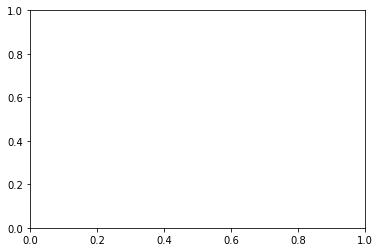

In [6]:
plt.scatter(d[1], d[2], alpha = d[3])

In [ ]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/synDs_12-Sep-2023 12:48:31", skiprows=3)
ts, x, y, w = data.T

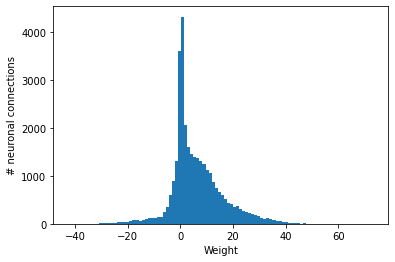

In [2]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/weights_12-Sep-2023 12:48:31", skiprows=3)
ts, x, y, w = data.T
d = np.vstack((ts,x,y,w))
idx = np.where(d[0] == 310000)[0]
plt.hist(d[3,idx], bins = 100);
#plt.xlim((-30, 40))
#plt.title("Weight distribution for STDP and syn. depression after 2s lifetime")
plt.xlabel("Weight")
plt.ylabel("# neuronal connections");

In [2]:
data = np.loadtxt("/gpfs/scratch/pn98bi/ge72puf2/ml_sim_data/weights_10-Aug-2023 18:05:56_2hsim", skiprows=3)
ts, x, y, w = data.T
d = np.vstack((ts,x,y,w))
idx = np.where(d[0] == 310000)[0]
plt.hist(d[3,idx], bins = 100);
#plt.xlim((-30, 40))
#plt.title("Weight distribution for STDP and syn. depression after 2s lifetime")
plt.xlabel("Weight")
plt.ylabel("# neuronal connections");

KeyboardInterrupt: 

<function matplotlib.pyplot.eventplot(positions, orientation='horizontal', lineoffsets=1, linelengths=1, linewidths=None, colors=None, alpha=None, linestyles='solid', *, data=None, **kwargs)>

In [3]:
exc_inh_divide = 942*0.8

In [11]:
idx = np.logical_and((d[1] < exc_inh_divide - 10),(d[2] > exc_inh_divide + 10))
pairs = np.where(idx)[0]

In [12]:
i = 10000
l = int(max(ts)/i)
wmed = np.zeros(l)
wstd = np.zeros(l)
for t in range(i, int(max(ts)), i):
    tidx = np.where(ts == t)[0]
    intersec = np.intersect1d(tidx, pairs)
    weights = w[intersec]
    idx = int(t/i)
    wmed[idx] = np.mean(weights)
    wstd[idx] = np.std(weights)

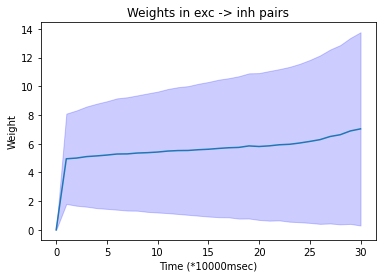

In [25]:
plt.plot(wmed)
plt.fill_between(range(l), (wmed + wstd),(wmed - wstd), color = "blue", alpha = 0.2)

plt.xlabel("Time (*%dmsec)" % i)
plt.title("Weights in exc -> inh pairs")
plt.ylabel("Weight");

In [16]:
idx = np.logical_and((d[1] > exc_inh_divide - 10),(d[2] > exc_inh_divide + 10))
pairs = np.where(idx)[0]

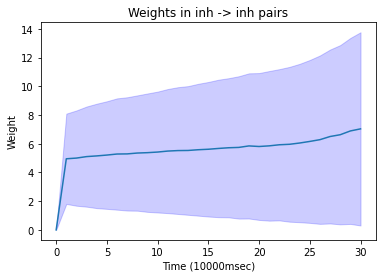

In [26]:
i = 10000
l = int(max(ts)/i)
wmed = np.zeros(l) 
wstd = np.zeros(l)
for t in range(i, int(max(ts)), i):
    tidx = np.where(ts == t)[0]
    intersec = np.intersect1d(tidx, pairs)
    weights = w[intersec]
    idx = int(t/i)
    wmed[idx] = np.mean(weights)
    wstd[idx] = np.std(weights)

plt.plot(wmed)
plt.fill_between(range(l), (wmed + wstd),(wmed - wstd), color = "blue", alpha = 0.2)

plt.xlabel("Time (%dmsec)" % i)
plt.title("Weights in inh -> inh pairs")
plt.ylabel("Weight");

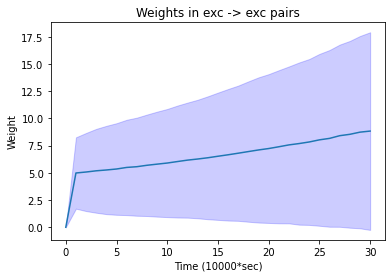

In [19]:
idx = np.logical_and((d[1] < exc_inh_divide - 10),(d[2] < exc_inh_divide + 10))
pairs = np.where(idx)[0]

i = 10000
l = int(max(ts)/i)
wmed = np.zeros(l) 
wstd = np.zeros(l)
for t in range(i, int(max(ts)), i):
    tidx = np.where(ts == t)[0]
    intersec = np.intersect1d(tidx, pairs)
    weights = w[intersec]
    idx = int(t/i)
    wmed[idx] = np.mean(weights)
    wstd[idx] = np.std(weights)

plt.plot(wmed)
plt.fill_between(range(l), (wmed + wstd),(wmed - wstd), color = "blue", alpha = 0.2)

plt.xlabel("Time (%d*sec)" % i)
plt.title("Weights in exc -> exc pairs")
plt.ylabel("Weight");

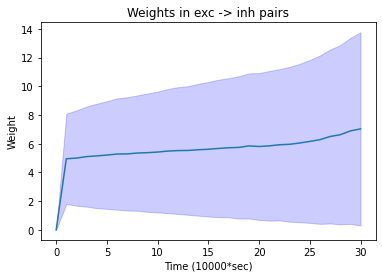

In [21]:
idx = np.logical_and((d[1] > exc_inh_divide - 10),(d[2] < exc_inh_divide + 10))
pairs = np.where(idx)[0]

i = 10000
l = int(max(ts)/i)
wmed = np.zeros(l) 
wstd = np.zeros(l)
for t in range(i, int(max(ts)), i):
    tidx = np.where(ts == t)[0]
    intersec = np.intersect1d(tidx, pairs)
    weights = w[intersec]
    idx = int(t/i)
    wmed[idx] = np.mean(weights)
    wstd[idx] = np.std(weights)

plt.plot(wmed)
plt.fill_between(range(l), (wmed + wstd),(wmed - wstd), color = "blue", alpha = 0.2)

plt.xlabel("Time (%d*sec)" % i)
plt.title("Weights in exc -> inh pairs")
plt.ylabel("Weight");

In [101]:
import nest
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import datetime
from pynestml.codegeneration.nest_code_generator_utils import NESTCodeGeneratorUtils



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Aug  2 2023 15:17:11

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [102]:
module_name, neuron_model_name, synapse_model_name = NESTCodeGeneratorUtils.generate_code_for(
    "mymodel_nest/izhikevich.nestml",
    "mymodel_nest/stdp_depression.nestml",
    post_ports=["post_spikes"])

nest.Install(module_name)

[7,izhikevich_custom13e630e08f6d489980da0b19a30cebaf_nestml, WARNING, [12:8;12:17]]: Variable 'a' has the same name as a physical unit!
[8,izhikevich_custom13e630e08f6d489980da0b19a30cebaf_nestml, WARNING, [15:8;15:17]]: Variable 'd' has the same name as a physical unit!
[14,stdp_depression13e630e08f6d489980da0b19a30cebaf_nestml, WARNING, [6:8;6:17]]: Variable 'D' has the same name as a physical unit!
[15,stdp_depression13e630e08f6d489980da0b19a30cebaf_nestml, WARNING, [9:8;9:28]]: Variable 'd' has the same name as a physical unit!

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Aug  2 2023 15:17:11

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

[28,izhikevich_custom13e630e08f6d489980da0b19a30cebaf_nestml, WARNING, [12:8;12:17]]: Variable 'a' has the same name as a physical uni

In [104]:
nest.ResetKernel()
A = np.loadtxt("test_adjacency_mtx.txt")
N = np.shape(A)[0]
Pe = 0.8
Ne = int(np.ceil(N*Pe))
Ni = N - Ne
rand_Ne = np.random.rand(Ne)
rand_Ni = np.random.rand(Ni)

nodes_exc = nest.Create(neuron_model_name, Ne, params={"a":0.02, "b":0.2, \
                                                        "c": -65+15*(rand_Ne)**2, "d": 8-6*(rand_Ne)**2})
nodes_inh = nest.Create(neuron_model_name, Ni, params={"a":0.02+0.08*(rand_Ni), \
                                                         "b":0.25-0.05*(rand_Ni), \
                                                        "c": -65, "d": 2})

In [4]:
MAX_EXC_WEIGHT=10
MAX_INH_WEIGHT=.5

exc_conn = {"synapse_model": synapse_model_name, "delay": 1, "weight":A[0:(Ne+Ni), 0:(Ne)]*np.random.rand(Ne + Ni, Ne)*MAX_EXC_WEIGHT, "Wmax" : 100, "Wmin":0}
inh_conn = {"synapse_model": synapse_model_name, "delay": 1, "weight":-A[0:(Ne+Ni), Ne:(Ne+Ni)]*np.random.rand(Ne + Ni, Ni)*MAX_INH_WEIGHT, "Wmax" : -100, "Wmin": 0}
nest.Connect(nodes_exc, nodes_exc + nodes_inh, "all_to_all", exc_conn)
nest.Connect(nodes_inh, nodes_exc + nodes_inh, "all_to_all", inh_conn)


In [5]:
noise = nest.Create("noise_generator", Ne+Ni)
#espikes = nest.Create("spike_recorder")
#ispikes = nest.Create("spike_recorder")
#espikes.set(label="nest_test-ex", record_to="ascii")
#ispikes.set(label="nest_test-in", record_to="ascii")
nest.Connect(noise, nodes_exc + nodes_inh, "one_to_one")
#nest.Connect(nodes_exc, espikes)
#nest.Connect(nodes_inh, ispikes)


In [6]:
w_targets = np.sum(A, axis = 0)
def normalize_weights(neurons_to_be_normalized, w_targets = None):
    if w_targets is None:
        w_targets = np.ones(len(neurons_to_be_normalized))

    for i, neuron in enumerate(neurons_to_be_normalized):
        conn = nest.GetConnections(target=neuron)
        w = np.array(conn.weight)
        w_normed = w / sum(abs(w))  # L1-norm
        conn.weight = w_targets[i] * w_normed


In [9]:
startsim = datetime.now()
normalize_weights(nodes_exc + nodes_inh, w_targets)
endsim = datetime.now()


In [11]:
endsim

datetime.datetime(2023, 8, 6, 12, 36, 29, 733282)

In [18]:
T = 200*10**3 #ms
dt = 1 #ms

startsim = datetime.now()
nest.Simulate(T)
endsim = datetime.now()


Aug 03 17:04:52 NodeManager::prepare_nodes [Info]: 
    Preparing 1886 nodes for simulation.

Aug 03 17:04:52 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1886
    Simulation time (ms): 200000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Aug 03 17:14:21 SimulationManager::run [Info]: 
    Simulation finished.
